In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
for dirname, _, filenames in os.walk("/content/drive/MyDrive/dataset/BR-35H"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/dataset/BR-35H/Training/meningioma_tumor/Tr-me_1157.jpg
/content/drive/MyDrive/dataset/BR-35H/Training/meningioma_tumor/Tr-me_0874.jpg
/content/drive/MyDrive/dataset/BR-35H/Training/meningioma_tumor/Tr-me_1143.jpg
/content/drive/MyDrive/dataset/BR-35H/Training/meningioma_tumor/Tr-me_1147.jpg
/content/drive/MyDrive/dataset/BR-35H/Training/meningioma_tumor/Tr-me_0958.jpg
/content/drive/MyDrive/dataset/BR-35H/Training/meningioma_tumor/Tr-me_1136.jpg
/content/drive/MyDrive/dataset/BR-35H/Training/meningioma_tumor/Tr-me_1108.jpg
/content/drive/MyDrive/dataset/BR-35H/Training/meningioma_tumor/Tr-me_1187.jpg
/content/drive/MyDrive/dataset/BR-35H/Training/meningioma_tumor/Tr-me_1170.jpg
/content/drive/MyDrive/dataset/BR-35H/Training/meningioma_tumor/Tr-me_1010.jpg
/content/drive/MyDrive/dataset/BR-35H/Training/meningioma_tumor/Tr-me_0961.jpg
/content/drive/MyDrive/dataset/BR-35H/Training/meningioma_tumor/Tr-me_0862.jpg
/

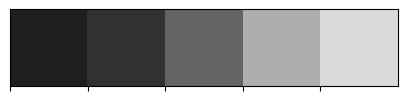

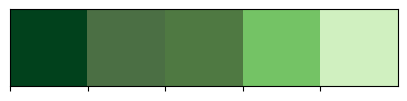

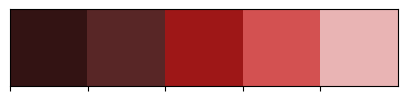

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
X_train = []
y_train = []
image_size = 224
#image_size = 150
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/dataset/BR-35H/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/dataset/BR-35H/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 303/303 [00:02<00:00, 112.85it/s]


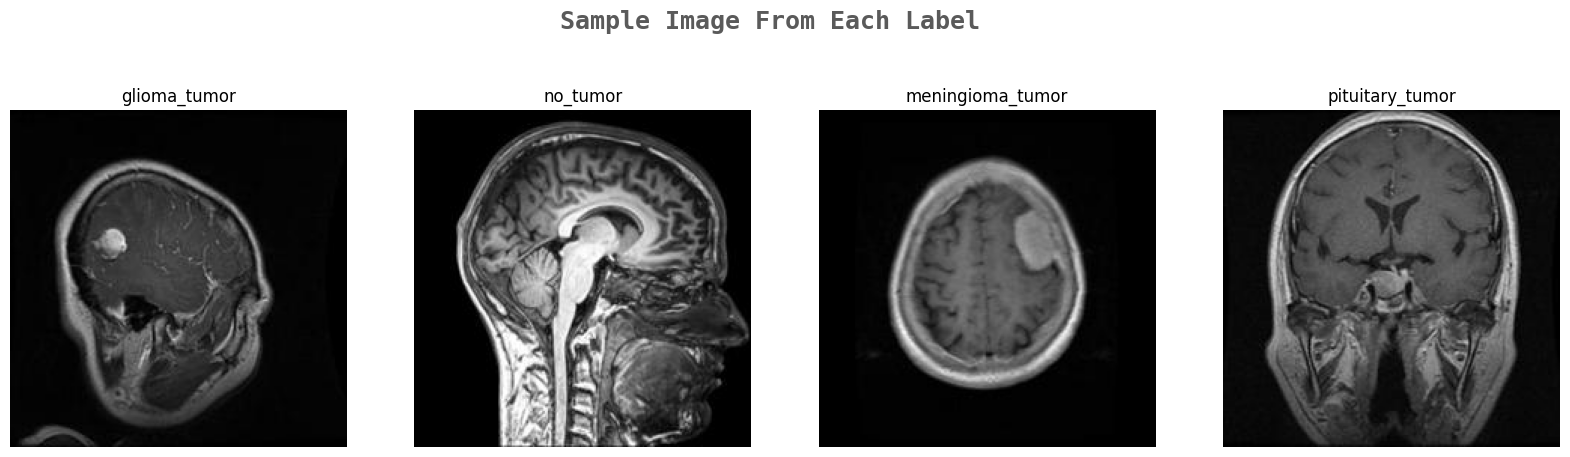

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [ ]:
X_train, y_train = shuffle(X_train,y_train, random_state=152)

In [ ]:
X_train.shape


(6664, 224, 224, 3)

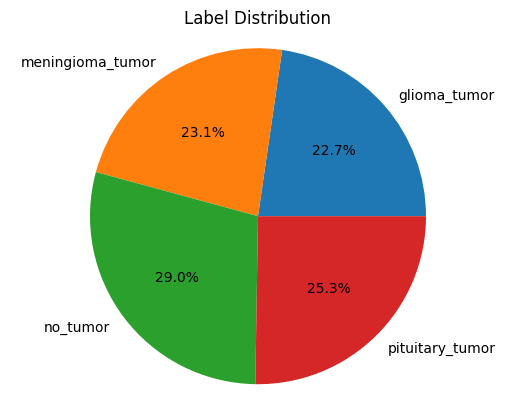

In [ ]:
import matplotlib.pyplot as plt
label_counts = np.unique(y_train, return_counts=True)
plt.pie(label_counts[1], labels=label_counts[0], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Label Distribution')
plt.show()


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=156)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import plot_model


In [ ]:
pretrained = InceptionV3(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
pretrained.trainable = False
my_model = Sequential()
my_model.add(pretrained)
my_model.add(Flatten())
my_model.add(Dense(100, activation='relu'))
my_model.add(Dense(4, activation='softmax'))

# Add additional inception blocks
my_model.add(Flatten())
my_model.add(Dense(100, activation='relu'))
my_model.add(Dense(100, activation='relu'))
my_model.add(Dense(100, activation='relu'))

# Add more inception blocks
my_model.add(Flatten())
my_model.add(Dense(200, activation='relu'))
my_model.add(Dense(200, activation='relu'))
my_model.add(Dense(200, activation='relu'))

# Add more inception blocks
my_model.add(Flatten())
my_model.add(Dense(300, activation='relu'))
my_model.add(Dense(300, activation='relu'))
my_model.add(Dense(300, activation='relu'))

# Add your own fully connected layers
my_model.add(Flatten())

# Add the full layer of GoogleNet (InceptionV1)
my_model.add(Dense(1024, activation='relu'))
my_model.add(Dense(1024, activation='relu'))

# Add the final output layer
my_model.add(Dense(4, activation='softmax'))

# Fine-tuning the model
for layer in my_model.layers[0].layers:
    if 'batch_normalization' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_5 (Flatten)         (None, 18432)             0         
                                                                 
 dense_14 (Dense)            (None, 100)               1843300   
                                                                 
 dense_15 (Dense)            (None, 4)                 404       
                                                                 
 flatten_6 (Flatten)         (None, 4)                 0         
                                                                 
 dense_16 (Dense)            (None, 100)               500       
                                                                 
 dense_17 (Dense)            (None, 100)              

In [ ]:
my_model = InceptionV3(weights='imagenet', include_top=True)
plot_model(my_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
tensorboard_GGN = TensorBoard(log_dir = 'logs')
checkpoint_GGN = ModelCheckpoint("ggnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr_GGN = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                               mode='auto',verbose=1)
ES = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience =4, restore_best_weights=True)
RL=tf.keras.callbacks.ReduceLROnPlateau(monitor="loss",patience=3,verbose=0,min_delta=0.0001,min_lr=1e-6)

In [ ]:
tf.random.set_seed(11)

In [ ]:
import time
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze some layers for fine-tuning
for layer in base_model.layers:
    layer.trainable = False
    if layer.name.startswith('mixed7'):
        layer.trainable = True

model_InceptionV3 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation='softmax')
])

model_InceptionV3.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

start_time = time.time()
history = model_InceptionV3.fit(X_train, y_train, validation_split=0.1, epochs=100, verbose=1, batch_size=30)
end_time = time.time()
training_time = end_time - start_time
print("Training time: {:.2f} seconds".format(training_time))


Epoch 1/100
160/160 [==============================] - 31s 106ms/step - loss: 3.4538 - accuracy: 0.4217 - val_loss: 2.1478 - val_accuracy: 0.5412
Epoch 2/100
160/160 [==============================] - 12s 73ms/step - loss: 1.9218 - accuracy: 0.5647 - val_loss: 1.5929 - val_accuracy: 0.6423
Epoch 3/100
160/160 [==============================] - 12s 72ms/step - loss: 1.5430 - accuracy: 0.6156 - val_loss: 1.4266 - val_accuracy: 0.6498
Epoch 4/100
160/160 [==============================] - 12s 72ms/step - loss: 1.3139 - accuracy: 0.6508 - val_loss: 1.1901 - val_accuracy: 0.7022
Epoch 5/100
160/160 [==============================] - 11s 71ms/step - loss: 1.1716 - accuracy: 0.6773 - val_loss: 1.0627 - val_accuracy: 0.7191
Epoch 6/100
160/160 [==============================] - 11s 70ms/step - loss: 1.0665 - accuracy: 0.6938 - val_loss: 1.0064 - val_accuracy: 0.7191
Epoch 7/100
160/160 [==============================] - 11s 71ms/step - loss: 0.9693 - accuracy: 0.7117 - val_loss: 0.8860 - val_a

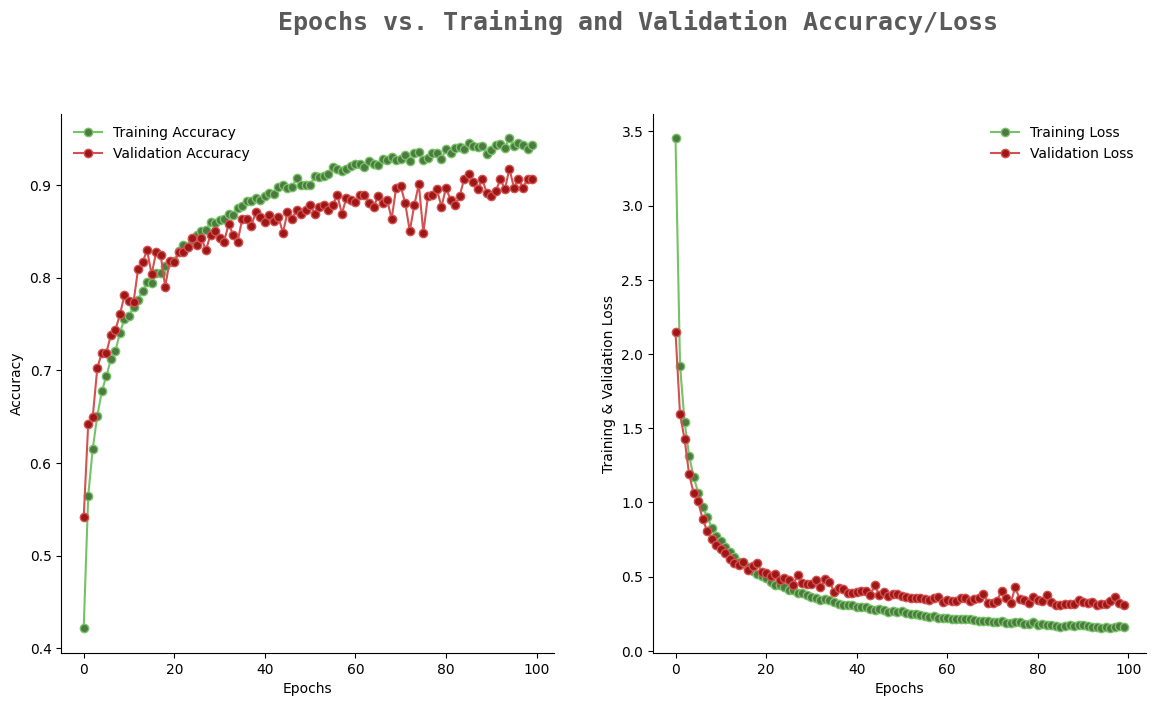

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(100)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [ ]:
pred = model_InceptionV3.predict(X_test)
#pred=Mymodel.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

42/42 [==============================] - 7s 96ms/step


"""In this,
0 - Glioma Tumor
1 - No Tumor
2 - Meningioma Tumor
3 - Pituitary Tumor"""

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       314
           1       0.94      0.97      0.95       386
           2       0.81      0.76      0.78       312
           3       0.93      0.94      0.93       321

    accuracy                           0.88      1333
   macro avg       0.88      0.88      0.88      1333
weighted avg       0.88      0.88      0.88      1333



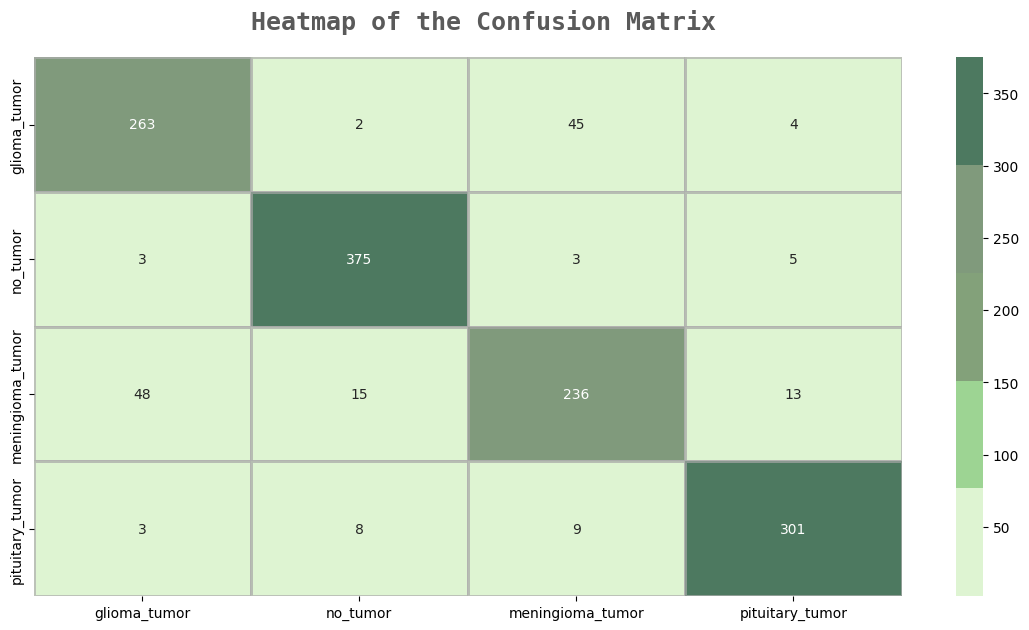

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3],fmt='d')
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

In [ ]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
        img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(150,150))
    img = img.reshape(1,150,150,3)
    p = model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [ ]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [ ]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)

        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

pretrained = InceptionV3(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
pretrained.trainable = False
my_model = Sequential()
my_model.add(pretrained)
my_model.add(Flatten())
my_model.add(Dense(100, activation='relu'))
my_model.add(Dense(4, activation='softmax'))

# Fine-tuning the model
for layer in my_model.layers[0].layers:
    if 'batch_normalization' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


87910968/87910968 [==============================] - 0s 0us/step
